In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file = r"Petroleo cru - WTI e Brent e derivados_data-diario_EIA - Original.xls"

In [7]:
excel_file = pd.ExcelFile(file)

In [8]:
# read data into single dataframe
df = pd.DataFrame()
df["crude_oil"] = pd.read_excel(excel_file, sheet_name="Data 1", header=2, index_col=0).iloc[:, 0] / 42
df["conventional_gas"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 0]
df["conventional_gas2"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 1]
df["rbob_regular_gas"] = pd.read_excel(excel_file, sheet_name="Data 3", header=2, index_col=0).iloc[:, 0]
df["heating_oil"] = pd.read_excel(excel_file, sheet_name="Data 4", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 0]
df["jet_fuel"] = pd.read_excel(excel_file, sheet_name="Data 6", header=2, index_col=0).iloc[:, 0]
df["propane"] = pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).iloc[:, 0]

In [14]:
df.isna().mean().sort_values()

crude_oil            0.015903
conventional_gas     0.028914
heating_oil          0.029120
conventional_gas2    0.029223
jet_fuel             0.128769
propane              0.189178
rbob_regular_gas     0.465097
diesel_fuel          0.549153
dtype: float64

In [155]:
# aggregate monthly
df["month_date"] = pd.Series(df.index).apply(lambda dt: dt.replace(day=1)).values
month_df = df.groupby("month_date").mean()
month_df.dropna(inplace=True)
month_df.shape

(209, 11)

In [149]:
# first and last month
month_df.index[[0, -1]]

DatetimeIndex(['2006-06-01', '2023-10-01'], dtype='datetime64[ns]', name='month_date', freq=None)

In [150]:
# validation that we have all months between first and last
(month_df.index == pd.date_range(month_df.index[0], month_df.index[-1], freq="MS")).mean()

1.0

In [151]:
# compute spreads (monthly)
# TODO: aplicar log
month_df["spread1"] = month_df["conventional_gas"] / month_df["crude_oil"]
month_df["spread2"] = month_df["rbob_regular_gas"] / month_df["crude_oil"]
month_df["spread3"] = month_df["heating_oil"] / month_df["crude_oil"]
month_df["spread4"] = month_df["diesel_fuel"] / month_df["crude_oil"]

<Axes: xlabel='month_date'>

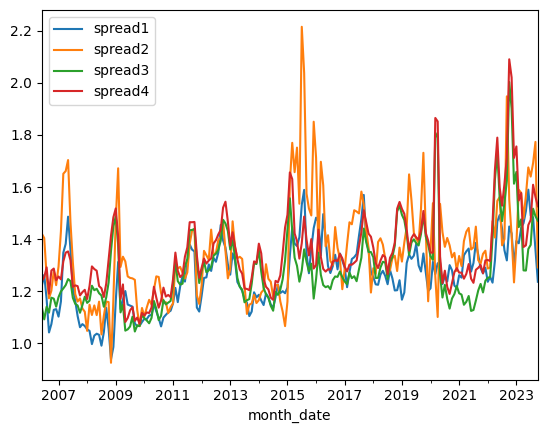

In [156]:
# plot spreads
month_df[["spread1", "spread2", "spread3", "spread4"]].dropna().plot()

In [157]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

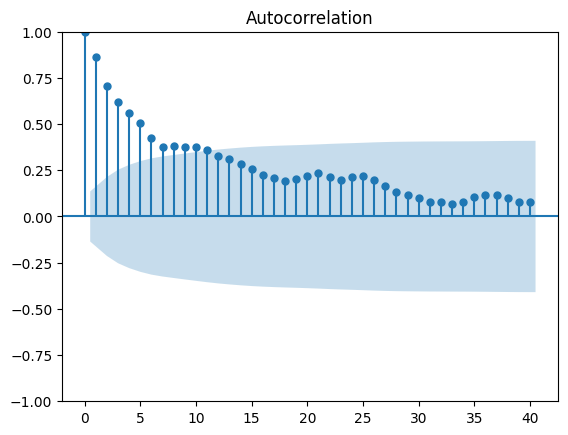

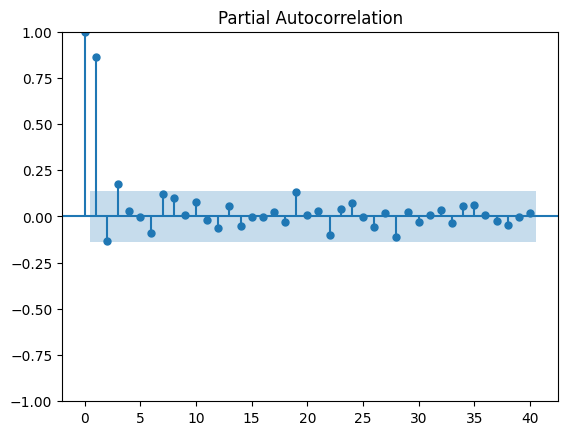

In [169]:
plot_acf( month_df.spread1.dropna(), lags=40);
plot_pacf(month_df.spread1.dropna(), lags=40);

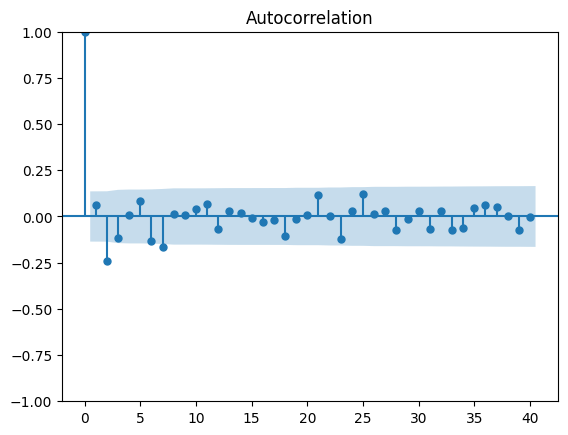

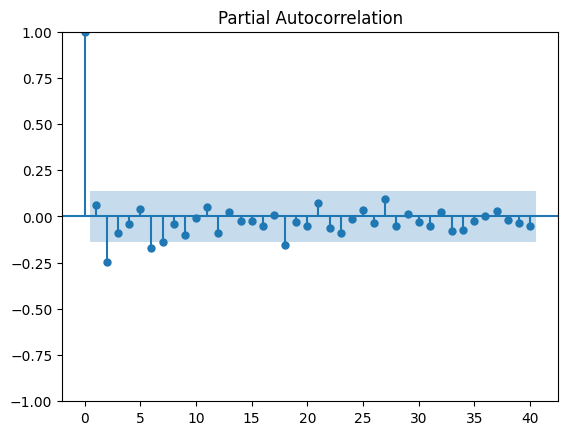

In [172]:
plot_acf( month_df.spread1.diff().dropna(), lags=40);
plot_pacf(month_df.spread1.diff().dropna(), lags=40);

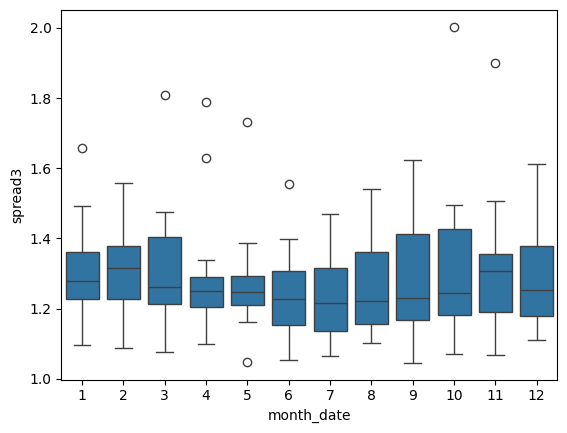

In [182]:
sns.boxplot(x=month_df.index.month, y=month_df.spread3);

In [184]:
month_df.to_csv("monthly_data.csv")